# **Pharmaceutical Sales prediction across multiple stores**

**Forecasting Sales is a essential use of Machine Learning(ML).Sales forecasts can be used to identify benchmarks and determine incremental impacts of new initiatives, plan resources in response to expected demand and project future budgets.**

## **Table of contents**
     1. Exploring the data and Data Pre-processing
     2. Building models with sklearn pipelines
     3. Choose a loss function
     4. Post Prediction analysis
     5. Serialize models

 ## **1. Data Preprocessing**

  1.1 Importing Libraries

In [1]:
#!pip install category_encoders
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import metrics
import numpy as np 
import matplotlib.pyplot as plt
import category_encoders as ce
%matplotlib inline
import pickle

In [2]:
train_data=pd.read_csv(r'C:\Users\HP\Desktop\Projects\Machine_Hotshots\notebook\data\Output.csv')

In [3]:
train_data.head()

,Weekdays,Weeks,Months,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,...,Store-1,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,23,6,867,3,6/3/2015,5608,469,1,1,...,867,d,c,21810.0,9.0,2012.0,0,NaN,NaN,"Jan,Apr,Jul,Oct"
1,1,23,6,868,3,6/3/2015,13500,816,1,1,...,868,d,c,1360.0,8.0,2005.0,1,10.0,2014.0,"Jan,Apr,Jul,Oct"
2,1,23,6,869,3,6/3/2015,7007,932,1,1,...,869,c,a,230.0,10.0,2001.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,1,23,6,870,3,6/3/2015,7911,971,1,1,...,870,a,a,780.0,4.0,2009.0,0,NaN,NaN,"Jan,Apr,Jul,Oct"
4,1,23,6,871,3,6/3/2015,9198,678,1,1,...,871,d,c,10620.0,NaN,NaN,0,NaN,NaN,"Jan,Apr,Jul,Oct"


**1.2 Cleansing the Data**

   1.2.1 Handling Null values

In [4]:
#Checking the no. of NaN values
train_data.isna().sum()

Weekdays                          0
Weeks                             0
Months                            0
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                  31050
SchoolHoliday                     0
Store-1                           0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                     0
dtype: int64

1) CompetitionDistance:

* Before deciding how to treat this,we know there are infinite ways of filling missing values.
* The most common and simplistic approach is to fill it with either the mean or the median of this variable.
* Let's quickly have a look at those metrics.

In [5]:
train_data[pd.isnull(train_data.CompetitionDistance)].head()

,Weekdays,Weeks,Months,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,...,Store-1,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
12,1,23,6,879,3,6/3/2015,5155,436,1,1,...,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
411,1,47,11,291,3,11/19/2014,0,0,0,0,...,291,d,a,NaN,NaN,NaN,0,NaN,NaN,"Jan,Apr,Jul,Oct"
676,1,23,6,291,2,6/2/2015,9897,973,1,1,...,291,d,a,NaN,NaN,NaN,0,NaN,NaN,"Jan,Apr,Jul,Oct"
1007,1,23,6,622,2,6/2/2015,5389,470,1,1,...,622,a,c,NaN,NaN,NaN,0,NaN,NaN,"Jan,Apr,Jul,Oct"
1663,1,52,12,291,4,12/25/2014,0,0,0,0,...,291,d,a,NaN,NaN,NaN,0,NaN,NaN,"Jan,Apr,Jul,Oct"


In [6]:
df_store_check_distribution=train_data.drop(train_data[pd.isnull(train_data.CompetitionDistance)].index)
df_store_check_distribution.head()

,Weekdays,Weeks,Months,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,...,Store-1,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,23,6,867,3,6/3/2015,5608,469,1,1,...,867,d,c,21810.0,9.0,2012.0,0,NaN,NaN,"Jan,Apr,Jul,Oct"
1,1,23,6,868,3,6/3/2015,13500,816,1,1,...,868,d,c,1360.0,8.0,2005.0,1,10.0,2014.0,"Jan,Apr,Jul,Oct"
2,1,23,6,869,3,6/3/2015,7007,932,1,1,...,869,c,a,230.0,10.0,2001.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,1,23,6,870,3,6/3/2015,7911,971,1,1,...,870,a,a,780.0,4.0,2009.0,0,NaN,NaN,"Jan,Apr,Jul,Oct"
4,1,23,6,871,3,6/3/2015,9198,678,1,1,...,871,d,c,10620.0,NaN,NaN,0,NaN,NaN,"Jan,Apr,Jul,Oct"


{'Mean': 5430.085652302903, 'Median': 2330.0, 'Standard Dev': 7715.31989799512}

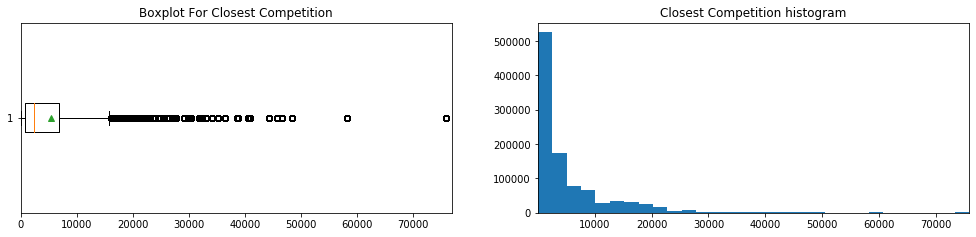

In [7]:
df_store_check_distribution=train_data.drop(train_data[pd.isnull(train_data.CompetitionDistance)].index)
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_store_check_distribution.CompetitionDistance, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df_store_check_distribution.CompetitionDistance+1000))
axes[0].set_title('Boxplot For Closest Competition')
axes[1].hist(df_store_check_distribution.CompetitionDistance, cumulative=False, bins=30)
axes[1].set_title("Closest Competition histogram")
axes[1].set_xlim((min(df_store_check_distribution.CompetitionDistance), max(df_store_check_distribution.CompetitionDistance)))
{"Mean":np.nanmean(train_data.CompetitionDistance),"Median":np.nanmedian(train_data.CompetitionDistance),"Standard Dev":np.nanstd(train_data.CompetitionDistance)}#That's what i thought, very different values, let's see why 

We see a highly right skewed distribution for this variable with a significant difference between the mean and the median. This being caused by the amount of disperness in the data with a standard deviation of 7659, higher than the mean and the median.

**What do we do then?**

It is realistically better to input the median value to the Nan stores then the mean since the mean is biased by those outliers.

In [8]:
train_data['CompetitionDistance'].fillna(train_data['CompetitionDistance'].median(), inplace = True)

2) CompetitionOpenSinceMonth and CompetitionOpenSinceYear?

* Since we have no information whatsoever on those missing values and no accurate way of filling those values.
* A creative way could be to apply a multilabel classification algorithm and train on the non Nan fields and then predict what could be most probably the month and year for those fields. But this approach is computationally too long.
* So for this purpose those fields are going to be assigned to 0 .

In [9]:
train_data.CompetitionOpenSinceMonth.fillna(0, inplace = True)
train_data.CompetitionOpenSinceYear.fillna(0,inplace=True)

3) Promo2SinceWeek, Promo2SinceYear and PromoInterval ?



* This case is pretty straighforward, all the missing values comes from fields where Promo2=0 which means there are no continuous promotional activities for those stores.
* Having no promotion means those fields have to be 0 as well since they are linked to Promo2.

In [10]:
train_data.Promo2SinceWeek.fillna(0,inplace=True)
train_data.Promo2SinceYear.fillna(0,inplace=True)
train_data.PromoInterval.fillna(0,inplace=True)


4) StateHoliday

In [11]:
train_data.StateHoliday.fillna(0,inplace=True)

In [12]:
train_data.count(0)/train_data.shape[0] * 100

Weekdays                     100.0
Weeks                        100.0
Months                       100.0
Store                        100.0
DayOfWeek                    100.0
Date                         100.0
Sales                        100.0
Customers                    100.0
Open                         100.0
Promo                        100.0
StateHoliday                 100.0
SchoolHoliday                100.0
Store-1                      100.0
StoreType                    100.0
Assortment                   100.0
CompetitionDistance          100.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                       100.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64

**Now all the null values are imputed**

**1.3 Exploratory Data Analysis**


This is an exploratory analysis of data gotten from Rossmann pharmaceuticals. The data highlights the different stores their types and assortments, details of sales per store, different promos each store runs, customer distribution and so on. 

A careful exploration of the data encapsulates checking all available features, checking their interactions and correlation as well as their variability with respect to the target variable (Sales). 

From exploring these data we want to determine possible trends and behavior in accordance to different period within the year, sales and customer behavior in the various stores. The goal is to check how some measures such as promos and opening of new stores affect purchasing behavior.

In [13]:
train_data['Date'] = pd.to_datetime(train_data['Date'])

In [28]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Months,Year,week,weekday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince
0,1,1,4,2015-09-17,1.0,1,0,0,9,2015,38,3,c,a,1270.0,0,0.0,0.0,0,84.0
1,2,3,4,2015-09-17,1.0,1,0,0,9,2015,38,3,a,a,14130.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",105.0
2,3,7,4,2015-09-17,1.0,1,0,0,9,2015,38,3,a,c,24000.0,0,0.0,0.0,0,29.0
3,4,8,4,2015-09-17,1.0,1,0,0,9,2015,38,3,a,a,7520.0,0,0.0,0.0,0,11.0
4,5,9,4,2015-09-17,1.0,1,0,0,9,2015,38,3,a,c,2030.0,0,0.0,0.0,0,181.0


In [30]:

test_data['SchoolHoliday'].sum()
test_data['SchoolHoliday'].count()
percent_school = test_data['SchoolHoliday'].sum()/test_data['SchoolHoliday'].count() #percentage of school holdays in test set
print(percent_school)

train_data['SchoolHoliday'].sum()
train_data['SchoolHoliday'].count()
percent_train_school = train_data['SchoolHoliday'].sum()/train_data['SchoolHoliday'].count() #percentage of school holdays in test set
print(percent_train_school)

0.4434871495327103
0.17864666946517382


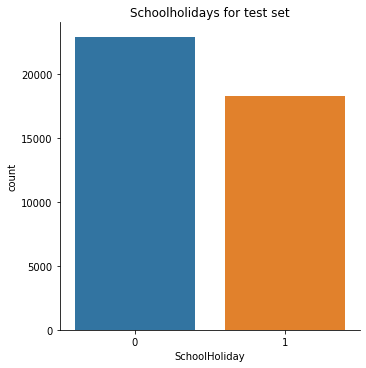

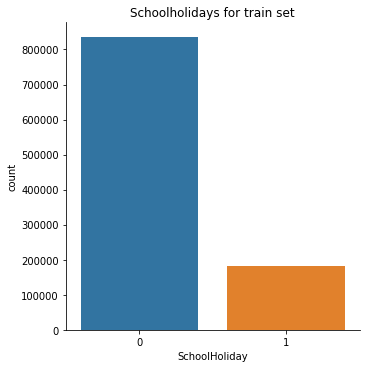

In [31]:
sns.catplot(x='SchoolHoliday', data = test_data, kind='count')
plt.title('Schoolholidays for test set')
sns.catplot(x='SchoolHoliday', data = train_data, kind='count')
plt.title('Schoolholidays for train set')

plt.show()

During the test period there are no Easter or Christmas holidays but interestingly during 44% of the time there are school holidays, which means the stores were closed while that is the case for only 18% of the train data.

In [32]:
time_series = train_data[["Date", "Sales"]]
time_series = time_series.set_index('Date')
time_series.head()


,Sales
Date,
2015-06-03,5608
2015-06-03,13500
2015-06-03,7007
2015-06-03,7911
2015-06-03,9198


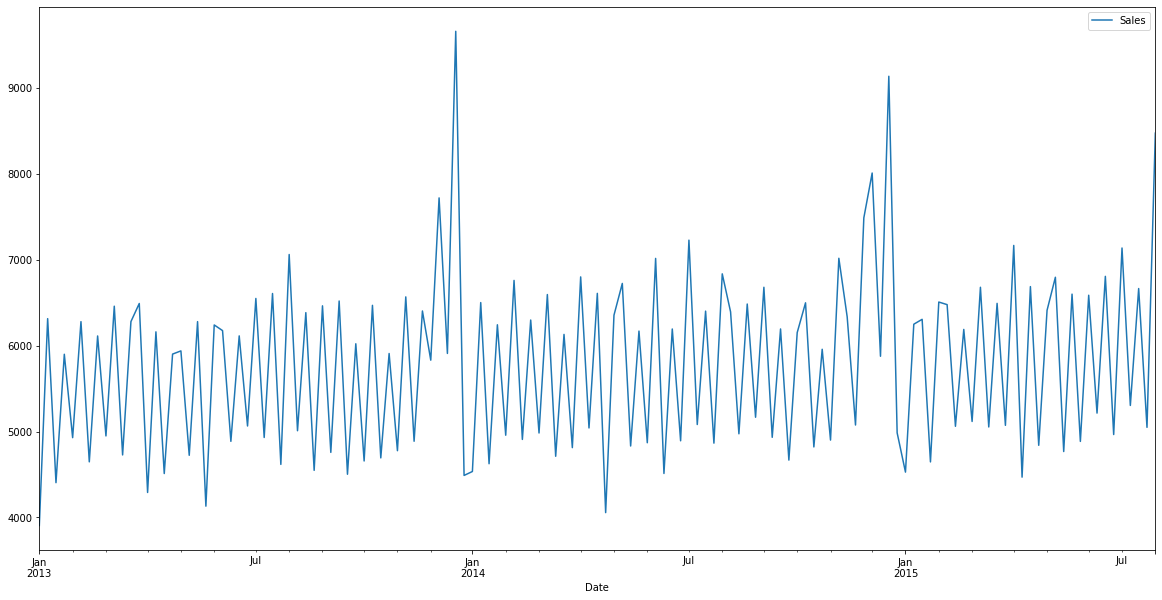

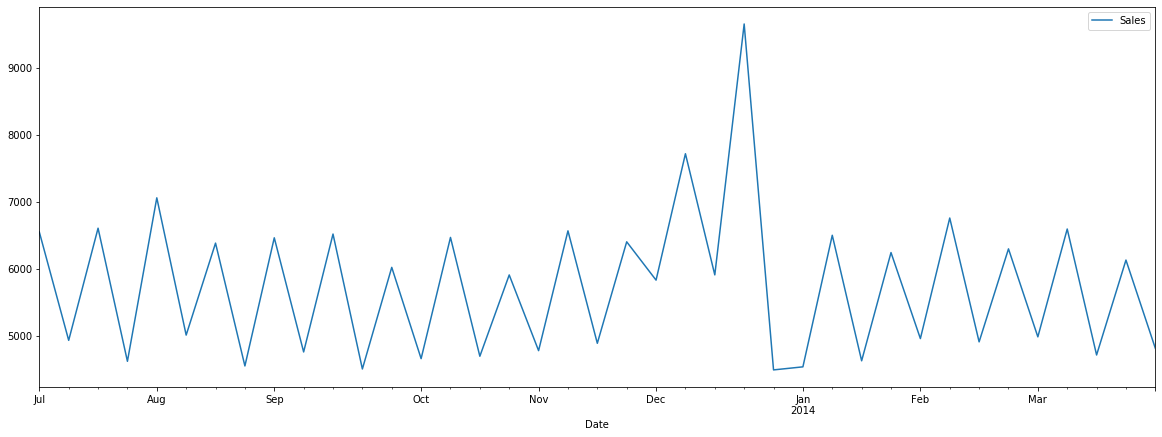

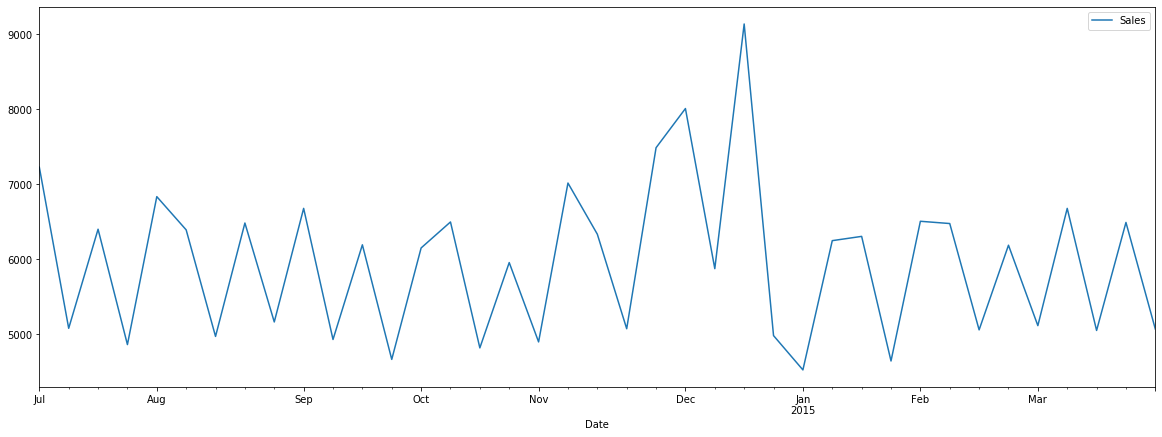

In [33]:
time_series_week = time_series.resample('W').mean()
time_series_week.plot(figsize=(20,10))
time_series_week.loc['2013-07':'2014-03'].plot(figsize=(20,7)) 
time_series_week.loc['2014-07':'2015-03'].plot(figsize=(20,7))

plt.show()

By considering sales during, before and after holiday periods, we can determine which time of the year stores make most sales. Taking into consideration one of the most festive period of the year, Christmas, I checked for trends between July of previous year  and March of new year.From above, it seen that the sales increases drastically during festive period (Christmas) but it is relatively constant during other periods of the year. This can also be an indicator to purchase behavior of customers at different periods within the year

              Sales  Customers
Sales      1.000000   0.894711
Customers  0.894711   1.000000


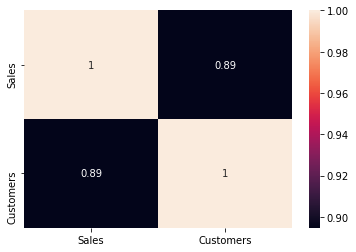

             sum
Promo           
1      318263948
0      325777807


In [34]:
corrMatrix = train_data[["Sales","Customers"]].corr()
print (corrMatrix)


#correlation heatmap
sns.heatmap(corrMatrix, annot=True)
plt.show()


print(train_data.groupby(['Promo'], sort=False)['Customers'].agg(['sum']))

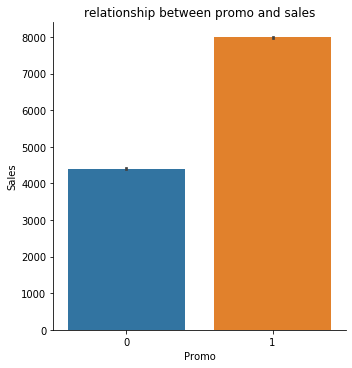

              sum
Promo            
1      3101206286
0      2771974337


In [35]:
#relationship between promo and sales
sns.catplot(x='Promo', y='Sales', data = train_data, kind='bar')
plt.title("relationship between promo and sales")
plt.show()

print(train_data.groupby(['Promo'], sort=False)['Sales'].agg(['sum']))

As it is expected, there is a strong positive correlation between sales and customers indicating that higher customers lead to more sales. Promo leads to higher sales but do not  necessarily mean increase in customers from as seen from the table below that when there are no promo (‘0’) the number of customers are higher.

In [36]:
#Adding salespercustomer column
train_data['SalesperCustomer']=train_data['Sales']/train_data['Customers']

To asses the performance of a store type, we have made visualizations to see the sales per customer and we get the store that makes its customers spend the most on average.

Let's compare first the total sales of each store type, its average sales and then see how it changes when we add the customers to the equation

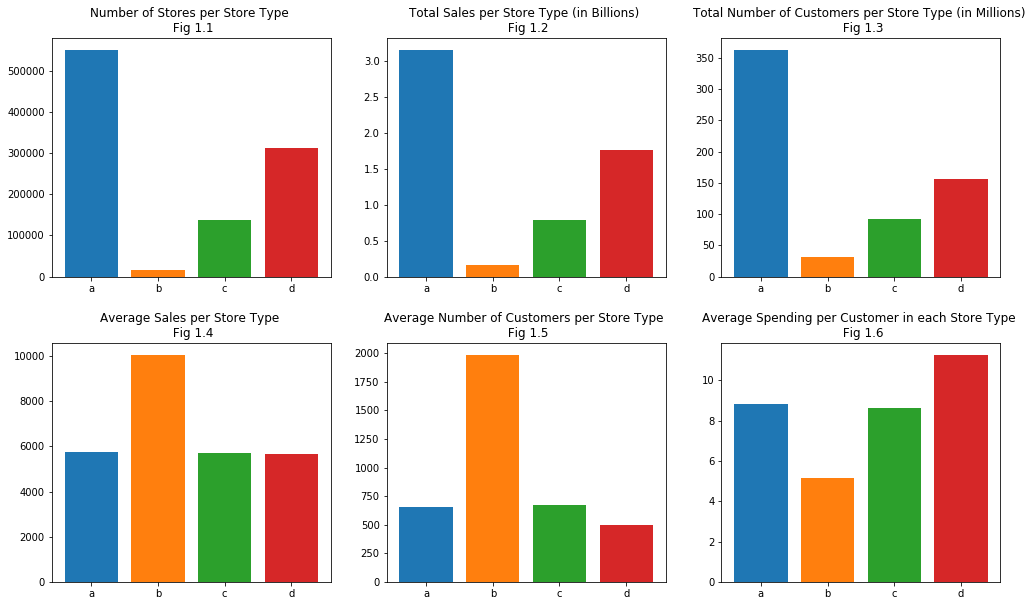

In [37]:
import itertools
fig, axes = plt.subplots(2, 3,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)

axes[0,0].bar(train_data.groupby(by="StoreType").count().Store.index,train_data.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(train_data.groupby(by="StoreType").sum().Sales.index,train_data.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type (in Billions) \n Fig 1.2")
axes[0,2].bar(train_data.groupby(by="StoreType").sum().Customers.index,train_data.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,2].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,0].bar(train_data.groupby(by="StoreType").sum().Customers.index,train_data.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Average Sales per Store Type \n Fig 1.4")
axes[1,1].bar(train_data.groupby(by="StoreType").sum().Customers.index,train_data.groupby(by="StoreType").Customers.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Number of Customers per Store Type \n Fig 1.5")
axes[1,2].bar(train_data.groupby(by="StoreType").sum().Sales.index,train_data.groupby(by="StoreType").SalesperCustomer.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,2].set_title("Average Spending per Customer in each Store Type \n Fig 1.6")
plt.show()

Findings:

From this training set we can see that Storetype A has the highest number of branches,sales and customers from the 4 different storetypes. But this doesn't mean it's the best performing Storetype.

When looking at the average sales and number of customers, we see that actually it is Storetype B who was the highest average Sales and highest average Number of Customers. One assumption could be that if B has only 17 stores but such a high amount of average sales and customers that it is likely hyper Rossman branches whereas A would be smaller in size but much more present.

Surprisingly it is StoreType D who has the highest average spending per Customer, this is probably explained by an average competition distance higher than ther rest which means each customer will buy more since he knows there isn't a lot of similair shops around

StoreType  Assortment
a          a             346389
           c             205238
b          a               6594
           b               8294
           c                942
c          a              70878
           c              65962
d          a             113584
           c             199328
Name: Assortment, dtype: int64

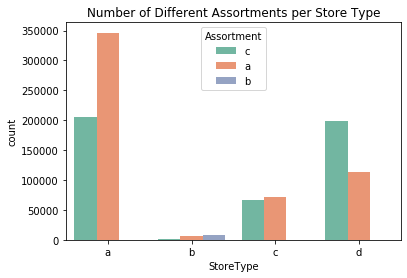

In [38]:
StoretypeXAssortment = sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"], data=train_data,palette=sns.color_palette("Set2", n_colors=3)).set_title("Number of Different Assortments per Store Type")
train_data.groupby(by=["StoreType","Assortment"]).Assortment.count()

We can clearly see here that most of the stores have either a assortment type or c assortment type.
Interestingly enough StoreType d which has the highest Sales per customer average actually has mostly c assortment type, this is most probably the reason for having this high average in Sales per customer.Having variery in stores always increases the customers spending pattern.
Another important factor here is the fact that store type b is the only one who has the b assortment type and a lot of them actually which stands for "extra" and by looking at fig 1.4 and 1.5 he's the one who has the highest number of customers and sales. Probably this formula of extra is the right middlepoint for customers between not too much variety like C assortment and not too basic like A assortment and this is what is driving the high traffic in this store.

**1.4 Handling Outliers**

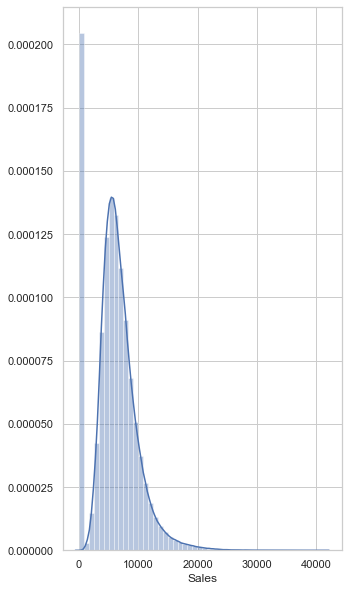

In [39]:
#Find the range of data
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(train_data["Sales"])

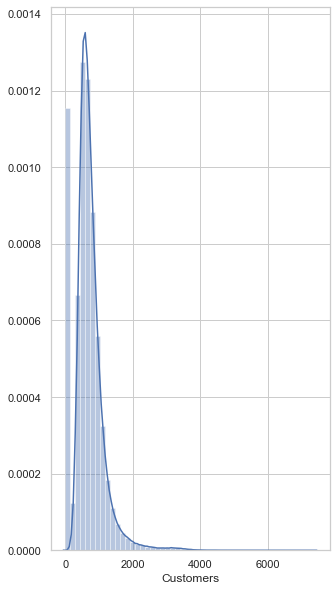

In [40]:
#Find the range of the data
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(train_data["Customers"])

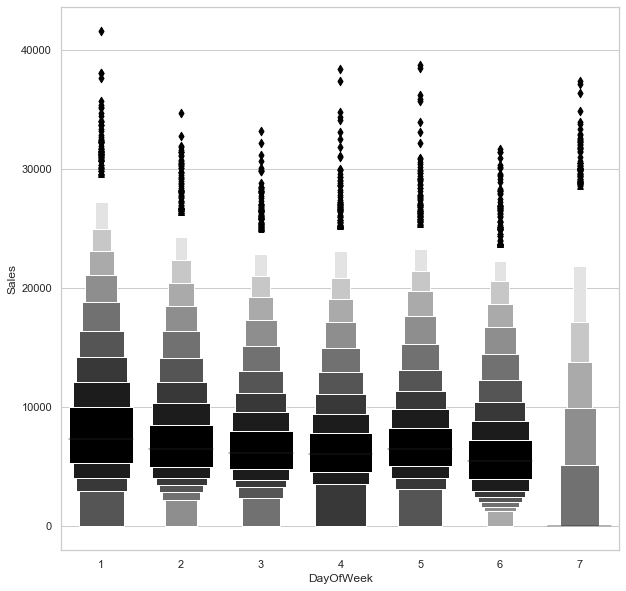

In [41]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxenplot(data=train_data,scale="linear",x="DayOfWeek",y="Sales",color="Black")

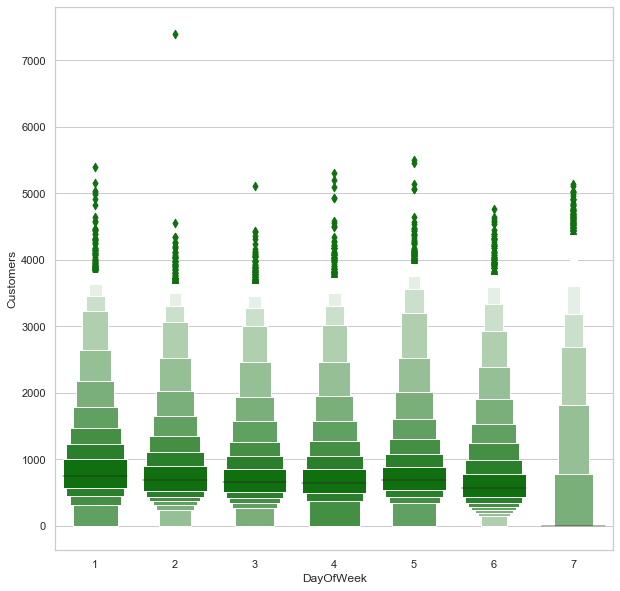

In [42]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxenplot(y="Customers", x="DayOfWeek",data=train_data, scale="linear",color="Green")

This data, contains many outliers, but these might have been caused to the surge of customers during a festival or Holiday, or due to an effective promo. 
Below we are handle the outliers

In [43]:
#Treating the outliers 
  # a function for replacing outliers with the median, used when there's too many outliers in a feature
def replace_outlier_with_median(dataFrame, feature):
    Q1 = dataFrame[feature].quantile(0.25)
    Q3 = dataFrame[feature].quantile(0.75)
    median = dataFrame[feature].quantile(0.50)

    IQR = Q3 - Q1

    upper_whisker = Q3 + (1.5 * IQR)
    lower_whisker = Q1 - (1.5 * IQR)

    dataFrame[feature] = np.where(dataFrame[feature] > upper_whisker, median, dataFrame[feature])
    dataFrame[feature] = np.where(dataFrame[feature] < lower_whisker, median, dataFrame[feature])

In [44]:
replace_outlier_with_median(train_data, 'Sales')

In [45]:
replace_outlier_with_median(train_data, 'Customers')

## 2. Building Models and Pipelines
 
2.1 **Feature Engeneering**

Generating new features from already existing features. 



In [48]:
train_data.head()

,Weekdays,Weeks,Months,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,23,6,867,3,2015-06-03,5608.0,469.0,1,1,...,d,c,21810.0,9.0,2012.0,0,0.0,0.0,"Jan,Apr,Jul,Oct",11.957356
1,1,23,6,868,3,2015-06-03,13500.0,816.0,1,1,...,d,c,1360.0,8.0,2005.0,1,10.0,2014.0,"Jan,Apr,Jul,Oct",16.544118
2,1,23,6,869,3,2015-06-03,7007.0,932.0,1,1,...,c,a,230.0,10.0,2001.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7.518240
3,1,23,6,870,3,2015-06-03,7911.0,971.0,1,1,...,a,a,780.0,4.0,2009.0,0,0.0,0.0,"Jan,Apr,Jul,Oct",8.147271
4,1,23,6,871,3,2015-06-03,9198.0,678.0,1,1,...,d,c,10620.0,0.0,0.0,0,0.0,0.0,"Jan,Apr,Jul,Oct",13.566372


In [50]:
train_data['Year']=train_data.Date.dt.year

In [51]:
del train_data["Date"]
train_data.head()

,Weekdays,Weeks,Months,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,Year
0,1,23,6,867,3,5608.0,469.0,1,1,0.0,...,c,21810.0,9.0,2012.0,0,0.0,0.0,"Jan,Apr,Jul,Oct",11.957356,2015
1,1,23,6,868,3,13500.0,816.0,1,1,0.0,...,c,1360.0,8.0,2005.0,1,10.0,2014.0,"Jan,Apr,Jul,Oct",16.544118,2015
2,1,23,6,869,3,7007.0,932.0,1,1,0.0,...,a,230.0,10.0,2001.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7.518240,2015
3,1,23,6,870,3,7911.0,971.0,1,1,0.0,...,a,780.0,4.0,2009.0,0,0.0,0.0,"Jan,Apr,Jul,Oct",8.147271,2015
4,1,23,6,871,3,9198.0,678.0,1,1,0.0,...,c,10620.0,0.0,0.0,0,0.0,0.0,"Jan,Apr,Jul,Oct",13.566372,2015


**2.2 correlation Analysis**

In [52]:
df_correlation=train_data[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo',
        'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'SalesperCustomer', 'Months', 'Year',
       'StateHoliday', 'Assortment', 'StoreType',
       'PromoInterval']]


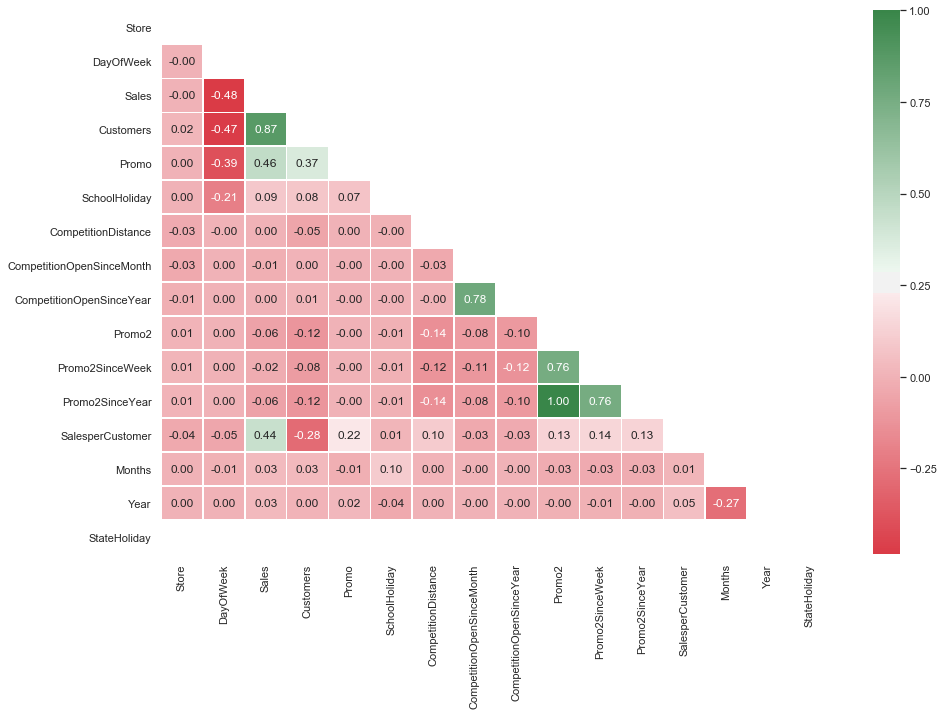

In [53]:
upper_triangle = np.zeros_like(df_correlation.corr(), dtype = np.bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True #make sure we don't show half of the other triangle
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df_correlation.corr(),ax=ax,mask=upper_triangle,annot=True, fmt='.2f',linewidths=0.5,cmap=sns.diverging_palette(10, 133, as_cmap=True))


-Since the competition variables CompetitionOpenSinceYear and CompeitionOpenSinceMonth have the same underlying meaning, merging them into one variable that we call CompetitionOpenSince makes easier for the algorithm to understand the pattern and creates less branches and thus complex trees.

In [54]:
train_data['CompetitionOpenSince'] = np.where((train_data['CompetitionOpenSinceMonth']==0) & 
                                                  (train_data['CompetitionOpenSinceYear']==0) , 0,
                                                  (train_data.Months - train_data.CompetitionOpenSinceMonth) 
                                                  + (12 * (train_data.Year - train_data.CompetitionOpenSinceYear)) )

In [55]:
del train_data['CompetitionOpenSinceYear']
del train_data['CompetitionOpenSinceMonth']

In [56]:
train_data.head()

,Weekdays,Weeks,Months,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,...,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,Year,CompetitionOpenSince
0,1,23,6,867,3,5608.0,469.0,1,1,0.0,...,d,c,21810.0,0,0.0,0.0,"Jan,Apr,Jul,Oct",11.957356,2015,33.0
1,1,23,6,868,3,13500.0,816.0,1,1,0.0,...,d,c,1360.0,1,10.0,2014.0,"Jan,Apr,Jul,Oct",16.544118,2015,118.0
2,1,23,6,869,3,7007.0,932.0,1,1,0.0,...,c,a,230.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7.518240,2015,164.0
3,1,23,6,870,3,7911.0,971.0,1,1,0.0,...,a,a,780.0,0,0.0,0.0,"Jan,Apr,Jul,Oct",8.147271,2015,74.0
4,1,23,6,871,3,9198.0,678.0,1,1,0.0,...,d,c,10620.0,0,0.0,0.0,"Jan,Apr,Jul,Oct",13.566372,2015,0.0


2.3 **Data Scaling and Data Encoding**

In [57]:
train_data.dtypes

Weekdays                  int64
Weeks                     int64
Months                    int64
Store                     int64
DayOfWeek                 int64
Sales                   float64
Customers               float64
Open                      int64
Promo                     int64
StateHoliday            float64
SchoolHoliday             int64
Store-1                   int64
StoreType                object
Assortment               object
CompetitionDistance     float64
Promo2                    int64
Promo2SinceWeek         float64
Promo2SinceYear         float64
PromoInterval            object
SalesperCustomer        float64
Year                      int64
CompetitionOpenSince    float64
dtype: object

In [58]:
# create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['StoreType','Assortment','PromoInterval'],use_cat_names=True)
# encode the categorical variables
train_data = OHE.fit_transform(train_data)

train_data.head()

,Weekdays,Weeks,Months,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,...,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec","PromoInterval_Feb,May,Aug,Nov",SalesperCustomer,Year,CompetitionOpenSince
0,1,23,6,867,3,5608.0,469.0,1,1,0.0,...,21810.0,0,0.0,0.0,1,0,0,11.957356,2015,33.0
1,1,23,6,868,3,13500.0,816.0,1,1,0.0,...,1360.0,1,10.0,2014.0,1,0,0,16.544118,2015,118.0
2,1,23,6,869,3,7007.0,932.0,1,1,0.0,...,230.0,1,14.0,2011.0,1,0,0,7.518240,2015,164.0
3,1,23,6,870,3,7911.0,971.0,1,1,0.0,...,780.0,0,0.0,0.0,1,0,0,8.147271,2015,74.0
4,1,23,6,871,3,9198.0,678.0,1,1,0.0,...,10620.0,0,0.0,0.0,1,0,0,13.566372,2015,0.0


**2.5 Feature scaling**

So far we have taken care of the missing values and the categorical (string) variables in the data. Next we will work with the continuous variables. Often the continuous variables in the data have different scales, for instance, a variable V1 can have a range from 0 to 1 while another variable can have a range from 0-1000.

Based on the type of model we are building, we normalize the data in such a way that the range of all the variables is almost similar. We did this easily in python using the StandardScaler function.
For this project we will be using **Random Forest Regressor**

**Defining Variable**

Defining independent and dependent variables
let independent/Features = X
let dependent/Target = Y
SInce we want to predict store sales, the target/ dependent variable is sales. For features we remove all columns that are strongly correlated to sales. From correlation analysis, we see that "customers" and "salespercustomer"  have a strong positive correlation with sale. There we do away with these columns.

In [59]:
## separate the independent and target variable 
X = train_data.drop(['Customers', 'Sales', 'SalesperCustomer'], axis = 1)

In [60]:
X.head()

,Weekdays,Weeks,Months,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Store-1,...,Assortment_b,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec","PromoInterval_Feb,May,Aug,Nov",Year,CompetitionOpenSince
0,1,23,6,867,3,1,1,0.0,0,867,...,0,21810.0,0,0.0,0.0,1,0,0,2015,33.0
1,1,23,6,868,3,1,1,0.0,0,868,...,0,1360.0,1,10.0,2014.0,1,0,0,2015,118.0
2,1,23,6,869,3,1,1,0.0,0,869,...,0,230.0,1,14.0,2011.0,1,0,0,2015,164.0
3,1,23,6,870,3,1,1,0.0,0,870,...,0,780.0,0,0.0,0.0,1,0,0,2015,74.0
4,1,23,6,871,3,1,1,0.0,0,871,...,0,10620.0,0,0.0,0.0,1,0,0,2015,0.0


In [61]:
#We delete store-1 because it is duplicated
del X['Store-1']

In [62]:
#a rule of thumb is to transform my target value to log if i see the values are very dispersed which is the case
#and then of course revert them with np.exp to their real values
y=np.log(train_data.Sales)
y

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


0          8.631949
1          9.510445
2          8.854665
3          8.976009
4          9.126741
5          9.299358
6          8.451053
7          8.579604
8          8.963288
9          9.346705
10         8.974365
11         9.169414
12         8.547722
13         9.132163
14         8.692826
15         8.970178
16         8.743053
17         8.976389
18         8.946635
19         9.086816
20         9.083189
21         9.238733
22         8.427925
23         9.040382
24         9.117677
25         8.978030
26         8.986697
27         9.395242
28         9.367857
29         8.910990
             ...   
1017179    8.629450
1017180    9.195836
1017181    8.532279
1017182    8.993552
1017183    8.054840
1017184    8.655911
1017185    9.257796
1017186    8.829958
1017187    8.771990
1017188    9.402447
1017189    8.958025
1017190    9.101306
1017191    9.282010
1017192    9.042158
1017193    8.740657
1017194    8.529122
1017195    9.310729
1017196    8.787983
1017197    8.950533


In [63]:
#Splitting our dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)
print ("Training and testing split was successful.")

Training and testing split was successful.


In [64]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Below is a funtion to help us identify if a dataframe has infinite numbers

In [65]:
def _assert_all_finite(X):
    """Like assert_all_finite, but only for ndarray."""
    X = np.asanyarray(X)
    # First try an O(n) time, O(1) space solution for the common case that
    # everything is finite; fall back to O(n) space np.isfinite to prevent
    # false positives from overflow in sum method.
    if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
            and not np.isfinite(X).all()):
        raise ValueError("Input contains NaN, infinity"
                         " or a value too large for %r." % X.dtype)

In [66]:
_assert_all_finite(y_train) #Asserting if the y_train dataset has infinite objects, and if yes we replace them

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [67]:
#Replacing the infinite objects with nan values
y_train.replace([np.inf, -np.inf], np.nan, inplace=True) 

In [68]:
#Now we will replace the nan values with the mean
y_train.fillna(8.72337779729373, inplace=True)

**2.6  Setting up the RandomForestRegressor object**

In [69]:

regressor = RandomForestRegressor(n_estimators=10, 
                             criterion='mse',random_state=0)
regressor.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [70]:
# save the model to disk using pickle
filename = 'finalized_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [71]:
#Predicting using the regressor model
y_pred = regressor.predict(X_test)
y_pred_l = pd.DataFrame(y_pred, columns=["sales prediction"]) #Saving the predictions into a dataframe
print(y_pred_l.head())
y_test.head()

   sales prediction
0          8.694410
1          8.723378
2          8.215211
3          8.512098
4          8.451766


991178    8.581669
4941          -inf
493413    8.271548
264865    8.488999
737476    8.558143
Name: Sales, dtype: float64

In [72]:
#Replacing the infinite values in y_test dataframe
y_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [73]:
y_test.mean() #computing the mean

8.72300394846444

In [74]:
#Replacing the nan values with the mean
y_test.fillna(8.72300394846444, inplace=True)

### Loss Function

In [75]:
# By using loss functions we will know how our model performs

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08720087569974283
Mean Squared Error: 0.020071843214432766
Root Mean Squared Error: 0.14167513266072054


**2.7 Feature Importance**

After the preprocessing and encoding steps, we had a total of 25 features and not all of these may be useful in forecasting the sales. Alternatively we can select the top 5 or top 7 features, which had a major contribution in forecasting sales values.

If the model performance is similar in both the cases, that is – by using 25 features and by using 5-7 features, then we should use only the top 7 features, in order to keep the model more simple and efficient.

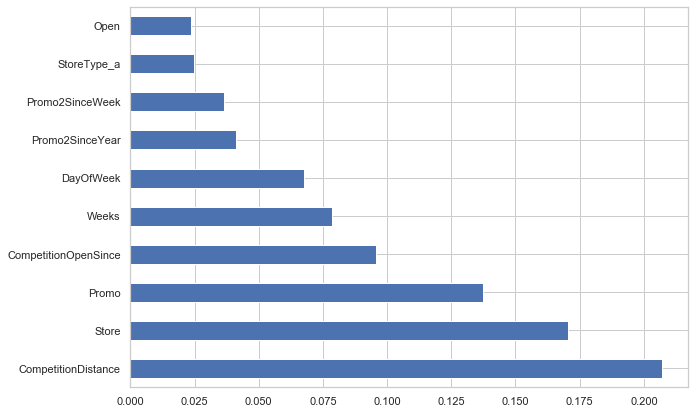

In [76]:
# plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(regressor.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind='barh');

Now, we are going to train the same random forest model using these 7 features only

In [77]:
X.head()

,Weekdays,Weeks,Months,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType_d,...,Assortment_b,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec","PromoInterval_Feb,May,Aug,Nov",Year,CompetitionOpenSince
0,1,23,6,867,3,1,1,0.0,0,1,...,0,21810.0,0,0.0,0.0,1,0,0,2015,33.0
1,1,23,6,868,3,1,1,0.0,0,1,...,0,1360.0,1,10.0,2014.0,1,0,0,2015,118.0
2,1,23,6,869,3,1,1,0.0,0,0,...,0,230.0,1,14.0,2011.0,1,0,0,2015,164.0
3,1,23,6,870,3,1,1,0.0,0,0,...,0,780.0,0,0.0,0.0,1,0,0,2015,74.0
4,1,23,6,871,3,1,1,0.0,0,1,...,0,10620.0,0,0.0,0.0,1,0,0,2015,0.0


In [78]:
X_data=X[['CompetitionDistance','Store','Promo','CompetitionOpenSince','Weeks','DayOfWeek','Promo2SinceYear','StoreType_a','Open']]

In [79]:
y_target=np.log(train_data.Sales)
y_target

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


0          8.631949
1          9.510445
2          8.854665
3          8.976009
4          9.126741
5          9.299358
6          8.451053
7          8.579604
8          8.963288
9          9.346705
10         8.974365
11         9.169414
12         8.547722
13         9.132163
14         8.692826
15         8.970178
16         8.743053
17         8.976389
18         8.946635
19         9.086816
20         9.083189
21         9.238733
22         8.427925
23         9.040382
24         9.117677
25         8.978030
26         8.986697
27         9.395242
28         9.367857
29         8.910990
             ...   
1017179    8.629450
1017180    9.195836
1017181    8.532279
1017182    8.993552
1017183    8.054840
1017184    8.655911
1017185    9.257796
1017186    8.829958
1017187    8.771990
1017188    9.402447
1017189    8.958025
1017190    9.101306
1017191    9.282010
1017192    9.042158
1017193    8.740657
1017194    8.529122
1017195    9.310729
1017196    8.787983
1017197    8.950533


In [80]:
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data, y_target, test_size=0.20, random_state=15)
print ("Training and testing split was successful.")

Training and testing split was successful.


In [81]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_data_train = sc.fit_transform(X_data_train)
X_data_test = sc.transform(X_data_test)

In [82]:
y_data_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [83]:
y_data_train.mean()

8.72337779729373

In [84]:
y_data_train.fillna(8.72337779729373, inplace=True)

In [85]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators=10, 
                             criterion='mse',random_state=0)
regressor1.fit(X_data_train, y_data_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [86]:
# save the new model to disk
filename = 'finalized1_model.sav'
pickle.dump(regressor1, open(filename, 'wb'))

In [87]:
#Predicting
y_pred1 = regressor1.predict(X_data_test)
y_pred_2 = pd.DataFrame(y_pred1, columns=["sales prediction"])
print(y_pred_2.head())
y_data_test.head()

   sales prediction
0          8.742488
1          8.723378
2          8.220179
3          8.502274
4          8.481200


991178    8.581669
4941          -inf
493413    8.271548
264865    8.488999
737476    8.558143
Name: Sales, dtype: float64

In [93]:
#Replacing the inf values with the nan values
y_data_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [94]:
y_data_test.mean() #Computing the mean

8.72300394846444

In [95]:
#Replacing the nan values using the mean
y_test.fillna(8.72300394846444, inplace=True)

### LOSS FUNCTION

In [92]:
#Computing different loss functions

print('Mean Absolute Error:', metrics.mean_absolute_error(y_data_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_data_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_data_test, y_pred1)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Making the Predictions

In [14]:
test = pd.read_csv(r"C:\Users\HP\Desktop\CV, P.Statement and others\10 Academy\week 5\test.csv\test.csv", parse_dates=['Date'])
store = pd.read_csv(r"C:\Users\HP\Desktop\CV, P.Statement and others\10 Academy\week 5\store.csv")


In [15]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [16]:
test.fillna(1, inplace = True)

In [17]:
test['Months']=test.Date.dt.month
test['Year']=test.Date.dt.year
test['week']=test.Date.dt.week
test['weekday']=test.Date.dt.weekday

In [18]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Months,Year,week,weekday
0,1,1,4,2015-09-17,1.0,1,0,0,9,2015,38,3
1,2,3,4,2015-09-17,1.0,1,0,0,9,2015,38,3
2,3,7,4,2015-09-17,1.0,1,0,0,9,2015,38,3
3,4,8,4,2015-09-17,1.0,1,0,0,9,2015,38,3
4,5,9,4,2015-09-17,1.0,1,0,0,9,2015,38,3


In [19]:
#merging test and store data
test_data = pd.merge(test, store, how = 'left', on = 'Store')

In [20]:
test_data.isnull().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                             0
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
Months                           0
Year                             0
week                             0
weekday                          0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

In [21]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Months,Year,...,weekday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,9,2015,...,3,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,9,2015,...,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,9,2015,...,3,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,9,2015,...,3,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,9,2015,...,3,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [22]:
#dealing with missing values
test_data['CompetitionDistance'].fillna(test_data['CompetitionDistance'].median(), inplace = True)

In [23]:
test_data.CompetitionOpenSinceMonth.fillna(0, inplace = True)
test_data.CompetitionOpenSinceYear.fillna(0,inplace=True)

In [24]:
test_data.Promo2SinceWeek.fillna(0,inplace=True)
test_data.Promo2SinceYear.fillna(0,inplace=True)
test_data.PromoInterval.fillna(0,inplace=True)


In [25]:
test_data['CompetitionOpenSince'] = np.where((test_data['CompetitionOpenSinceMonth']==0) & 
                                                  (test_data['CompetitionOpenSinceYear']==0) , 0,
                                                  (test_data.Months - test_data.CompetitionOpenSinceMonth) 
                                                  + (12 * (test_data.Year - test_data.CompetitionOpenSinceYear)) )

In [26]:
del test_data['CompetitionOpenSinceYear']
del test_data['CompetitionOpenSinceMonth']

In [27]:
test_data.isnull().sum()

Id                      0
Store                   0
DayOfWeek               0
Date                    0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
Months                  0
Year                    0
week                    0
weekday                 0
StoreType               0
Assortment              0
CompetitionDistance     0
Promo2                  0
Promo2SinceWeek         0
Promo2SinceYear         0
PromoInterval           0
CompetitionOpenSince    0
dtype: int64

## Predicting the sales of the stores for the next six weeks 

In [96]:
#we will use test data
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Months,Year,week,weekday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince
0,1,1,4,2015-09-17,1.0,1,0,0,9,2015,38,3,c,a,1270.0,0,0.0,0.0,0,84.0
1,2,3,4,2015-09-17,1.0,1,0,0,9,2015,38,3,a,a,14130.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",105.0
2,3,7,4,2015-09-17,1.0,1,0,0,9,2015,38,3,a,c,24000.0,0,0.0,0.0,0,29.0
3,4,8,4,2015-09-17,1.0,1,0,0,9,2015,38,3,a,a,7520.0,0,0.0,0.0,0,11.0
4,5,9,4,2015-09-17,1.0,1,0,0,9,2015,38,3,a,c,2030.0,0,0.0,0.0,0,181.0


In [97]:
# create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['StoreType','Assortment','PromoInterval'],use_cat_names=True)
# encode the categorical variables
test_data = OHE.fit_transform(test_data)

test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Months,Year,...,Assortment_b,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec",CompetitionOpenSince
0,1,1,4,2015-09-17,1.0,1,0,0,9,2015,...,0,1270.0,0,0.0,0.0,1,0,0,0,84.0
1,2,3,4,2015-09-17,1.0,1,0,0,9,2015,...,0,14130.0,1,14.0,2011.0,0,1,0,0,105.0
2,3,7,4,2015-09-17,1.0,1,0,0,9,2015,...,0,24000.0,0,0.0,0.0,1,0,0,0,29.0
3,4,8,4,2015-09-17,1.0,1,0,0,9,2015,...,0,7520.0,0,0.0,0.0,1,0,0,0,11.0
4,5,9,4,2015-09-17,1.0,1,0,0,9,2015,...,0,2030.0,0,0.0,0.0,1,0,0,0,181.0


In [98]:
del test_data['Date']

In [99]:
test_data1=test_data.drop(['Id'],axis=1)

In [100]:
cols = test_data1.select_dtypes(exclude=['float']).columns

test_data1[cols] = test_data1[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [101]:
del test_data1['PromoInterval_0']

In [102]:
test_data1.replace([np.inf, -np.inf], np.nan, inplace=True)

In [103]:
test_data1.dtypes

Store                             float32
DayOfWeek                         float32
Open                              float64
Promo                             float32
StateHoliday                      float32
SchoolHoliday                     float32
Months                            float32
Year                              float32
week                              float32
weekday                           float32
StoreType_c                       float32
StoreType_a                       float32
StoreType_d                       float32
StoreType_b                       float32
Assortment_a                      float32
Assortment_c                      float32
Assortment_b                      float32
CompetitionDistance               float64
Promo2                            float32
Promo2SinceWeek                   float64
Promo2SinceYear                   float64
PromoInterval_Jan,Apr,Jul,Oct     float32
PromoInterval_Feb,May,Aug,Nov     float32
PromoInterval_Mar,Jun,Sept,Dec    

In [104]:
test_data1.mean()

Store                              555.899533
DayOfWeek                            3.979167
Open                                 0.854361
Promo                                0.395833
StateHoliday                         0.000000
SchoolHoliday                        0.443487
Months                               8.354167
Year                              2015.000000
week                                34.645833
weekday                              2.979167
StoreType_c                          0.103972
StoreType_a                          0.538551
StoreType_d                          0.343458
StoreType_b                          0.014019
Assortment_a                         0.494159
Assortment_c                         0.495327
Assortment_b                         0.010514
CompetitionDistance               5082.359813
Promo2                               0.580607
Promo2SinceWeek                     14.182243
Promo2SinceYear                   1168.078271
PromoInterval_Jan,Apr,Jul,Oct     

In [105]:
test_data1.fillna(8.72300394846444, inplace=True)

In [106]:
sc = StandardScaler()
test_data1 = sc.fit_transform(test_data1)

In [107]:
rossman_yhat= regressor.predict(test_data1)

rossman_preds= pd.DataFrame({'Id': test_data['Id'], 
                          'Sales': np.exp(rossman_yhat)})

In [108]:
rossman_preds.to_csv("Rossman_predictions.csv",index=False)

## Making predictions using model trained with ten features

In [109]:
test_data.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Months,Year,week,...,Assortment_b,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec",CompetitionOpenSince
0,1,1,4,1.0,1,0,0,9,2015,38,...,0,1270.0,0,0.0,0.0,1,0,0,0,84.0
1,2,3,4,1.0,1,0,0,9,2015,38,...,0,14130.0,1,14.0,2011.0,0,1,0,0,105.0
2,3,7,4,1.0,1,0,0,9,2015,38,...,0,24000.0,0,0.0,0.0,1,0,0,0,29.0
3,4,8,4,1.0,1,0,0,9,2015,38,...,0,7520.0,0,0.0,0.0,1,0,0,0,11.0
4,5,9,4,1.0,1,0,0,9,2015,38,...,0,2030.0,0,0.0,0.0,1,0,0,0,181.0


In [110]:
df_test=test_data[['Store','Promo','CompetitionDistance','CompetitionOpenSince','week','DayOfWeek','Promo2SinceYear','StoreType_a','Open']]

In [111]:
rossman1_yhat= regressor1.predict(df_test)
rossman1_preds= pd.DataFrame({'Id': test_data['Id'], 
                          'Sales': np.exp(rossman1_yhat)})

In [112]:
rossman1_preds

,Id,Sales
0,1,10477.826207
1,2,6911.560490
2,3,7245.524511
3,4,7245.524511
4,5,7245.524511
5,6,7245.524511
6,7,7245.524511
7,8,8415.272958
8,9,8415.272958
9,10,7245.524511


In [113]:
rossman1_preds.to_csv("Rossman_prections1.csv",index=False)

# XGBoost Model Prediction

In [ ]:
predictions

# **MODEL PIPELINE** #

## Identifying features to build the Model pipeline

We are now familiar with the data, we have performed required preprocessing steps, and built a machine learning model on the data. At this stage we must list down the final set of features and necessary preprocessing steps (for each of them) to be used in the machine learning pipeline.

**Selected Features and Preprocessing Steps**

1. **Store:** a unique Id for each store
2. **StoreType_a:**Storetype differentiates between 4 different store models: a, b, c, d. Storetype a is one of the storetypes
3. **CompetitionDistance:** distance in meters to the nearest competitor store
4. **CompetitionOpenSince:** gives the approximate year and month of the time the nearest competitor was opened
5. **Promo2SinceYear:** describes the year and  when the store started participating in Promo2
6. **Open:** an indicator for whether the store was open: 0 = closed, 1 = open.
7.**Promo:** indicates whether a store is running a promo on that day
8. **DayOfWeek:** indicates the day of the week
9. **Week:** it shows the week of the year it was

Apart from these 9 columns, we will drop the rest of the columns since we will not use them to train the model.

#**PIPELINE DESIGN**

We wil define our pipeline into three stages:

* Perform required data preprocessing and transformations
* Data scaling
* Build a model to predict the sales

First of all, we will read the data set and separate the independent and target variable from the training dataset.

In [ ]:
# importing required libraries
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# read the training data set
data = pd.read_csv(r'C:\Users\HP\Desktop\Projects\Machine_Hotshots\notebook\data\Output.csv')

# top rows of the data
data.head()
test['Months']=test.Date.dt.month
test['Year']=test.Date.dt.year
test['week']=test.Date.dt.week
test['weekday']=test.Date.dt.weekday

# seperate the independent and target variables
train_x = data.drop(columns=['Customers', 'Sales', 'SalesperCustomer'])
#a rule of thumb is to transform my target value to log if i see the values are very dispersed which is the case
#and then of course revert them with np.exp to their real values
train_y = np.log(data.Sales)

In [ ]:

#standardadizing our data
sc = StandardScaler()
X_data_train = sc.fit_transform(X_data_train)
X_data_test = sc.transform(X_data_test)
def data_scale(dataframe):
  sc=StandardScaler()
  dataframe=sc.fit_transform(dataframe)

This will be the second step in our machine learning pipeline. After this step, the data will be ready to be used by the model to make predictions.



In [ ]:
# pre-processsing step
# Drop the columns - 
# Impute the missing values in column Item_Weight by mean
# Scale the data in the column Item_MRP
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('impute_competitionDistance', SimpleImputer(strategy='median'), ['CompetitionDistance']),
                                              ('impute_NullValues', SimpleImputer(strategy='0'), ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval']),
                                              ('drop_columns', 'drop', ['SchoolHoliday','CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Months', 'Year',
                                              'StateHoliday', 'Assortment','PromoInterval']),
                                              ('scale_data', StandardScaler(),['Item_MRP'])])

##Predict the target

When we use the fit() function with a pipeline object, all three steps are executed. Post the model training process, we use the predict() function that uses the trained model to generate the predictions.

In [ ]:
# Define the Pipeline
"""
Step1: Data Scaling
Step2: pre processing
Step3: Train a Random Forest Model
"""
model_pipeline = Pipeline(steps=[('Data scaling',data_scale()), 
                                 ('pre_processing',pre_process),
                                 ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))
                                 ])
# fit the pipeline with the training data
model_pipeline.fit(train_x,train_y)

# predict target values on the training data
model_pipeline.predict(train_x)

Now, we will read the test data set and we call predict function only on the pipeline object to make predictions on the test data.

In [ ]:
# read the test data
test_data = pd.read_csv('/content/drive/My Drive/test.csv')

# predict target variables on the test data 
model_pipeline.predict(test_data)